In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
df = pd.read_csv("train.csv")
print("Train shape: ",df.shape)

Train shape:  (10886, 12)


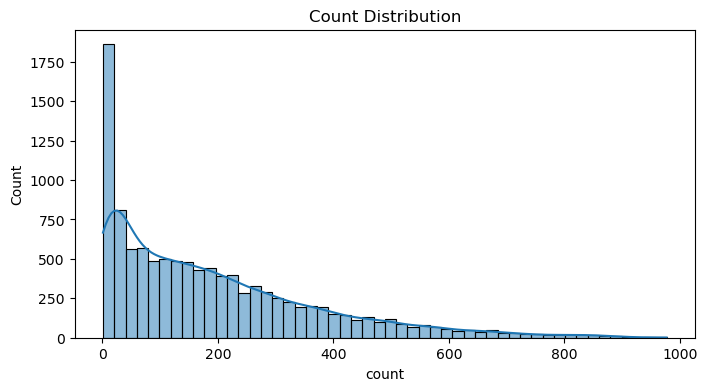

In [3]:
plt.figure(figsize = (8,4))
sns.histplot(df['count'],bins = 50,kde = True)
plt.title("Count Distribution")
plt.show()

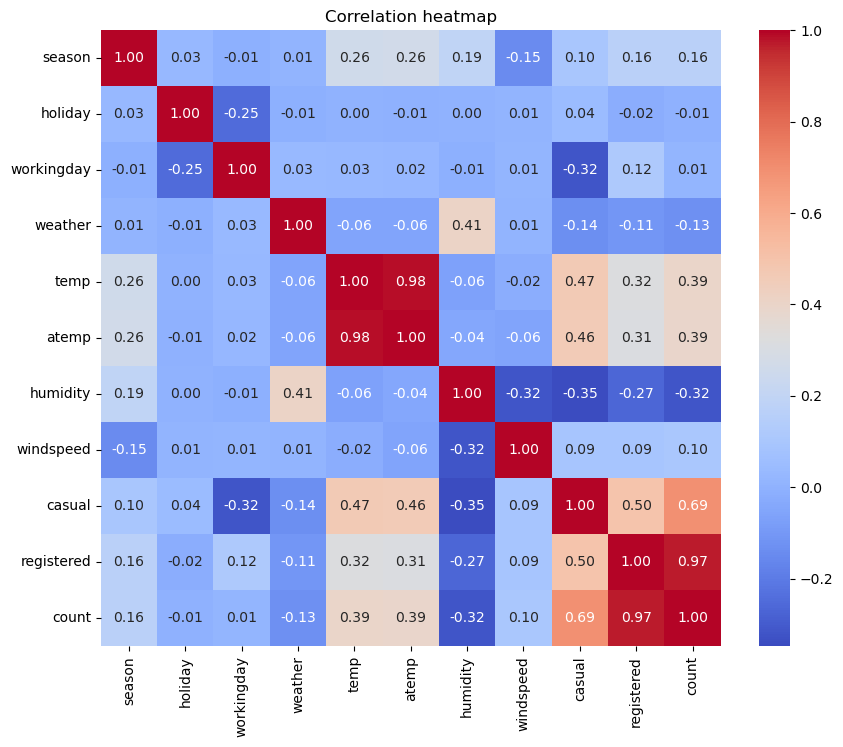

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm',fmt = ".2f")
plt.title("Correlation heatmap")
plt.show()

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [7]:
for df in [df]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df.drop('datetime',axis = 1,inplace = True)

In [8]:
print(df.head().to_string())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count  year  month  day  hour  weekday
0       1        0           0        1  9.84  14.395        81        0.0       3          13     16  2011      1    1     0        5
1       1        0           0        1  9.02  13.635        80        0.0       8          32     40  2011      1    1     1        5
2       1        0           0        1  9.02  13.635        80        0.0       5          27     32  2011      1    1     2        5
3       1        0           0        1  9.84  14.395        75        0.0       3          10     13  2011      1    1     3        5
4       1        0           0        1  9.84  14.395        75        0.0       0           1      1  2011      1    1     4        5


In [9]:
print(df.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [11]:
X = df.drop(['count','registered','count'],axis =1).values
y = df['count'].values.reshape(1,-1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.T, test_size=0.2, random_state=42
)

In [13]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train).T
X_test = scaler_X.transform(X_test).T

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train).T
y_test = scaler_y.transform(y_test).T


In [14]:
layers_dims = [X_train.shape[0], 32, 16, 1]  

In [15]:
def relu(Z):
    return np.maximum(0, Z)

In [16]:
def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [17]:
def linear(Z):
    return Z

In [18]:
def linear_backward(dA,Z):
    return dA

In [19]:
def initialize_parameters(layer_dims):
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = (
            np.random.randn(layer_dims[l], layer_dims[l-1])
            * np.sqrt(2 / layer_dims[l-1])
        )
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters



In [20]:
def fwd_fxn(A,W,b):
    Z = np.dot(W,A)+b
    cache = (A,W,b)
    return Z,cache

In [21]:
def lin_activation_fwd(A_prev,W,b,activation):
    Z,fwd_cache = fwd_fxn(A_prev,W,b)
    if activation == "relu":
        A = relu(Z)
    elif activation == "linear":
        A = linear(Z)

    cache = (fwd_cache,Z)
    return A,cache

In [22]:
def L_layer_fwd_model(X,parameters):
    caches = []
    A = X
    L = len(parameters)//2
    for l in range(1,L):
        A_prev = A
        A,cache = lin_activation_fwd(A_prev,parameters[f"W{l}"],parameters[f"b{l}"],activation = "relu")
        caches.append(cache)
    AL,cache = lin_activation_fwd(A,parameters[f"W{L}"],parameters[f"b{L}"],activation = "linear")
    caches.append(cache)
    return AL,caches

In [23]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (1/(2*m)) * np.sum((AL - Y)**2)
    return cost

In [24]:
def lin_bwd(dZ,cache):
    A_prev,W,b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis = 1,keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev,dW,db

In [25]:
def lin_activation_bwd(dA,cache,activation):
    lin_cache,Z = cache
    if activation == "relu":
        dZ = relu_backward(dA,Z)
    elif activation == "linear":
        dZ = linear_backward(dA,Z)
    return lin_bwd(dZ,lin_cache)

In [26]:
def L_layer_bwd_model(AL,Y,caches):
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)
    dAL = AL-Y
    cache_current = caches[-1]
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = lin_activation_bwd(dAL,cache_current,"linear")

    for l in reversed(range(L-1)):
        cache_current = caches[l]
        dA_prev,dW,db = lin_activation_bwd(grads["dA"+str(l+1)],cache_current,"relu")
        grads["dA"+str(l)] = dA_prev
        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db
    return grads

In [27]:
def update_parameters(parameters,grads,lr):
    L = len(parameters)//2
    for l in range(1,L+1):
        parameters[f"W{l}"] -= lr*grads[f"dW{l}"]
        parameters[f"b{l}"] -= lr*grads[f"db{l}"]
    return parameters

In [28]:
def model(X,Y,layer_dims,lr = 0.01,iterations = 2000):
    parameters = initialize_parameters(layer_dims)
    costs = []
    for i in range(iterations):
        AL,caches = L_layer_fwd_model(X,parameters)
        cost = compute_cost(AL,Y)
        grads = L_layer_bwd_model(AL,Y,caches)
        parameters = update_parameters(parameters,grads,lr)
        if i%100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost:.5f}")
    return parameters,costs

In [29]:
parameters,costs = model(X_train, y_train, layers_dims, lr=0.1, iterations=20000)

Cost after iteration 0: 0.73521
Cost after iteration 100: 0.20779
Cost after iteration 200: 0.18514
Cost after iteration 300: 0.17116
Cost after iteration 400: 0.16147
Cost after iteration 500: 0.15472
Cost after iteration 600: 0.14947
Cost after iteration 700: 0.14514
Cost after iteration 800: 0.14150
Cost after iteration 900: 0.13831
Cost after iteration 1000: 0.13546
Cost after iteration 1100: 0.13293
Cost after iteration 1200: 0.13065
Cost after iteration 1300: 0.12861
Cost after iteration 1400: 0.12674
Cost after iteration 1500: 0.12497
Cost after iteration 1600: 0.12325
Cost after iteration 1700: 0.12156
Cost after iteration 1800: 0.11996
Cost after iteration 1900: 0.11836
Cost after iteration 2000: 0.11684
Cost after iteration 2100: 0.11527
Cost after iteration 2200: 0.11363
Cost after iteration 2300: 0.11198
Cost after iteration 2400: 0.11037
Cost after iteration 2500: 0.10879
Cost after iteration 2600: 0.10717
Cost after iteration 2700: 0.10552
Cost after iteration 2800: 0.103

In [30]:
def predict(X, parameters):
    AL, _ = L_layer_fwd_model(X, parameters)
    return AL

In [31]:
y_train_pred = predict(X_train, parameters)
y_test_pred  = predict(X_test, parameters)

In [32]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [33]:
train_mse = mse(y_train, y_train_pred)
test_mse  = mse(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE :", test_mse)

Train MSE: 0.027373549595601433
Test MSE : 0.03262392022711126


In [34]:
train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)

Train RMSE: 0.1654495379129281
Test RMSE : 0.18062092964856333


In [35]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))


Train R2: 0.9726264504043985
Test R2 : 0.9676190466296154


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train.T, y_train.T)

y_test_lr = lr.predict(X_test.T).T
print("Linear Regression Test R2:", r2_score(y_test.T, y_test_lr.T))


Linear Regression Test R2: 0.6230644881716774


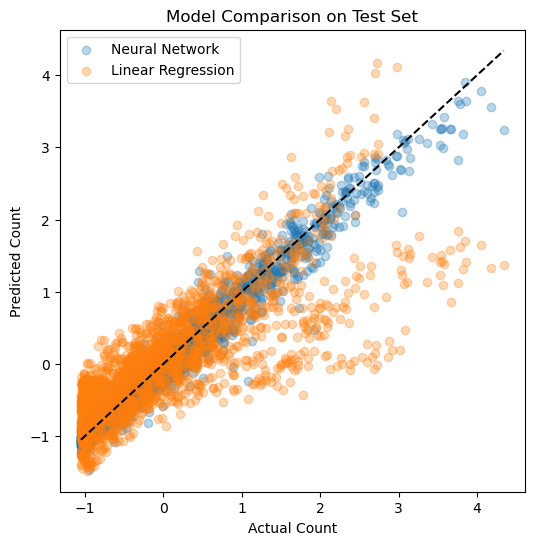

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(y_test.flatten(), y_test_pred.flatten(), alpha=0.3, label="Neural Network")
plt.scatter(y_test.flatten(), y_test_lr.flatten(), alpha=0.3, label="Linear Regression")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--'
)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.legend()
plt.title("Model Comparison on Test Set")
plt.show()


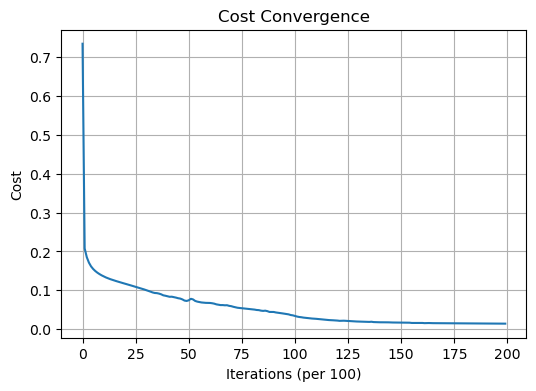

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(costs)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.grid(True)
plt.show()